In [2]:
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt

Referensi:
Brunton dan Kuntz. Data Driven Science and Engineering - Machine Learning, Dynamical Systems, and Control.

# Singular Value Decomposition (SVD)

Diberikan suatu matrix $\mathbf{X} \in \mathbb{C}^{n \times m}$, SVD adalah suatu dekomposisi matriks yang didefinisikan sebagai:

$$
\mathbf{X} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^{*}
$$

- $\mathbf{U} \in \mathbb{C}^{n \times n}$: matriks unitary
- $\mathbf{V} \in \mathbb{C}^{m \times m}$: matriks unitary
- $\boldsymbol{\Sigma} \in \mathbb{R}$: matriks diagonal


Kolom-kolom dari matriks $\mathbf{U}$ disebut vektor singular kiri dan kolom-kolom dari $\mathbf{V}$ adalah vektor singular kanan.

Jika $n \geq m$, maka matriks $\boldsymbol{\Sigma}$ memiliki paling banyak $m$ elemen bukan nol pada diagonal sehingga dapat ditulis sebagai:
$$
\boldsymbol{\Sigma} = \begin{bmatrix}
\hat{\boldsymbol{\Sigma}} \\
\mathbf{0}
\end{bmatrix}
$$
Dalam kasus ini, matriks $\mathbf{X}$ dapat direpresentasikan secara eksak dengan menggunakan
*enonomy SVD*:
$$
\mathbf{X} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^{*} =
\begin{bmatrix}
\hat{\mathbf{X}} && \hat{\mathbf{U}}^{\perp}
\end{bmatrix}
\begin{bmatrix}
\hat{\boldsymbol{\Sigma}} \\
\mathbf{0}
\end{bmatrix}
\mathbf{V}^{*} = 
\hat{\mathbf{U}} \hat{\boldsymbol{\Sigma}} \mathbf{V}^{*}
$$


![caption](images_priv/Brunton_Fig_1_1.svg)

## SVD dengan NumPy

SVD pada NumPy dapat dilakukan dengan menggunakan fungsi `svd` yang tersedia pada modul `np.linalg`:

```python
U, Σ, Vt = np.linalg.svd(X, full_matrices=True) # Full SVD
U, Σ, Vt = np.linalg.svd(X, full_matrices=False) # Economy SVD
```

Nilai singular `Σ` dikembalikan sebagai vektor. Untuk mendapatkan matriks $\boldsymbol{\Sigma}$, kita harus mengkonstruksinya secara manual, misalnya (untuk kasus full SVD):
```python
Σ_full = np.zeros((n,m))
idx_min = min(n,m)
Σ_full[:idx_min,:idx_min] = np.diag(Σ)
```

Coba lengkapi kode berikut:

In [4]:
# Shapes of the matrix
n = 5
m = 3

X = np.random.rand(n,m)
print("X = ")
print(X)

X = 
[[0.1138792  0.76912541 0.01874642]
 [0.08216222 0.6902647  0.10227228]
 [0.27167986 0.22354913 0.89464991]
 [0.59958437 0.80494771 0.18951581]
 [0.43524536 0.55768136 0.24027158]]


In [5]:
print("Full SVD:")
U, Σ, Vt = np.linalg.svd(X, full_matrices=True)

Full SVD:


In [6]:
U

array([[ 0.41342684, -0.37710219, -0.45700144, -0.56986919, -0.39149836],
       [ 0.38400077, -0.2496155 , -0.52820623,  0.5823794 ,  0.4148107 ],
       [ 0.37061029,  0.88029792, -0.26333109, -0.00957201, -0.1352357 ],
       [ 0.59289271, -0.14173596,  0.56463587,  0.36161811, -0.42285675],
       [ 0.43903064,  0.02173758,  0.35212346, -0.45301661,  0.69106048]])

In [7]:
U.shape

(5, 5)

In [8]:
Σ

array([1.67604805, 0.82635779, 0.36368076])

In [9]:
Vt

array([[ 0.43309837,  0.82812405,  0.35586002],
       [ 0.12123644, -0.44474345,  0.88741478],
       [ 0.89315594, -0.34119469, -0.29301647]])

In [10]:
# Check the decomposition
Σ_full = np.zeros((n,m))
idx_min = min(n,m)
Σ_full[:idx_min,:idx_min] = np.diag(Σ)

In [11]:
Σ_full

array([[1.67604805, 0.        , 0.        ],
       [0.        , 0.82635779, 0.        ],
       [0.        , 0.        , 0.36368076],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [13]:
# Do the matrix multiplication here
X_recons = np.matmul( np.matmul(U, Σ_full), Vt )

In [14]:
# This should be close to zeroes
print("X_recons - X")
print(X_recons - X)

X_recons - X
[[-5.55111512e-17 -4.44089210e-16 -2.87964097e-16]
 [ 0.00000000e+00 -1.11022302e-16 -1.38777878e-17]
 [-1.66533454e-16 -3.33066907e-16 -1.11022302e-16]
 [-2.22044605e-16 -3.33066907e-16 -2.22044605e-16]
 [-1.66533454e-16 -3.33066907e-16 -2.49800181e-16]]


Coba seperti kode di atas, namun dengan menggunakan economy SVD:

In [15]:
# Economy
U, Σ, Vt = np.linalg.svd(X, full_matrices=False)

In [17]:
U

array([[ 0.41342684, -0.37710219, -0.45700144],
       [ 0.38400077, -0.2496155 , -0.52820623],
       [ 0.37061029,  0.88029792, -0.26333109],
       [ 0.59289271, -0.14173596,  0.56463587],
       [ 0.43903064,  0.02173758,  0.35212346]])

In [18]:
Σ

array([1.67604805, 0.82635779, 0.36368076])

In [20]:
Vt

array([[ 0.43309837,  0.82812405,  0.35586002],
       [ 0.12123644, -0.44474345,  0.88741478],
       [ 0.89315594, -0.34119469, -0.29301647]])

In [21]:
X_recons = np.matmul( np.matmul(U, np.diag(Σ)), Vt )

In [22]:
X_recons

array([[0.1138792 , 0.76912541, 0.01874642],
       [0.08216222, 0.6902647 , 0.10227228],
       [0.27167986, 0.22354913, 0.89464991],
       [0.59958437, 0.80494771, 0.18951581],
       [0.43524536, 0.55768136, 0.24027158]])

In [25]:
X - X_recons

array([[5.55111512e-17, 4.44089210e-16, 2.87964097e-16],
       [0.00000000e+00, 1.11022302e-16, 1.38777878e-17],
       [1.66533454e-16, 3.33066907e-16, 1.11022302e-16],
       [2.22044605e-16, 3.33066907e-16, 2.22044605e-16],
       [1.66533454e-16, 3.33066907e-16, 2.49800181e-16]])

In [33]:
U, Σ, Vt = np.linalg.svd(X, full_matrices=True)

In [34]:
U

array([[ 0.41342684, -0.37710219, -0.45700144, -0.56986919, -0.39149836],
       [ 0.38400077, -0.2496155 , -0.52820623,  0.5823794 ,  0.4148107 ],
       [ 0.37061029,  0.88029792, -0.26333109, -0.00957201, -0.1352357 ],
       [ 0.59289271, -0.14173596,  0.56463587,  0.36161811, -0.42285675],
       [ 0.43903064,  0.02173758,  0.35212346, -0.45301661,  0.69106048]])

In [35]:
U.shape

(5, 5)

In [36]:
np.linalg.inv(U)

array([[ 0.41342684,  0.38400077,  0.37061029,  0.59289271,  0.43903064],
       [-0.37710219, -0.2496155 ,  0.88029792, -0.14173596,  0.02173758],
       [-0.45700144, -0.52820623, -0.26333109,  0.56463587,  0.35212346],
       [-0.56986919,  0.5823794 , -0.00957201,  0.36161811, -0.45301661],
       [-0.39149836,  0.4148107 , -0.1352357 , -0.42285675,  0.69106048]])

In [39]:
U.transpose() - np.linalg.inv(U)

array([[-6.66133815e-16, -2.22044605e-16, -3.88578059e-16,
        -2.22044605e-16, -3.88578059e-16],
       [ 2.22044605e-16,  1.11022302e-16,  0.00000000e+00,
        -1.11022302e-16,  3.46944695e-18],
       [ 4.44089210e-16,  5.55111512e-16,  5.55111512e-17,
        -1.11022302e-16,  5.55111512e-17],
       [ 3.33066907e-16,  0.00000000e+00,  7.28583860e-17,
         2.77555756e-16,  1.11022302e-16],
       [-5.55111512e-17, -1.11022302e-16, -2.77555756e-17,
        -1.11022302e-16,  1.11022302e-16]])

In [43]:
np.dot(U[:,0], U[:,1])

0.0

In [45]:
np.dot(U[:,1], U[:,3])

-1.3183898417423734e-16

In [46]:
np.dot(Vt[:,1], Vt[:,1])

0.9999999999999999

In [47]:
np.dot(Vt[:,1], Vt[:,0])

-2.1510571102112408e-16

In [48]:
np.dot(X[:,0], X[:,0])

0.6424689867829622

In [49]:
np.dot(X[:,0], X[:,1])

0.9303971485392131

## Aproksimasi matriks dengan SVD

SVD memberikan aproksimasi rank-rendah (low rank approximation) yang optimal terhadap suatu matriks $\boldsymbol{\Sigma}$.
Aproksimasi ini dapat ditulis sebagai:
$$
\tilde{\mathbf{X}} = \sum_{k=1}^{r} \sigma_{k} \mathbf{u}_{k} \mathbf{v}^{*}_{k}
= \sigma_{1} \mathbf{u}_{1} \mathbf{v}^{*}_{1} +
\sigma_{2} \mathbf{u}_{2} \mathbf{v}^{*}_{2} + \cdots
\sigma_{r} \mathbf{u}_{r} \mathbf{v}_{r}
$$
dengan:
- $\tilde{\mathbf{X}}$: aproksimasi rank-$r$ dari matriks $\mathbf{X}$.
- $\mathbf{u}_{k}$ dan $\mathbf{v}_{k}$: kolom ke-$k$ dari matriks $\mathbf{U}$ dan $\mathbf{V}$.

## Contoh aproksimasi matriks (citra)

Fungsi untuk mengubah RGB menjadi grayscale
[sumber: StackOverflow](
https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python)

In [50]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [51]:
#img = matplotlib.image.imread('./images_priv/dog.jpg')
img = matplotlib.image.imread('./images_priv/cat1.jpg')

img_gray = rgb2gray(img)
img_gray.shape

(600, 600)

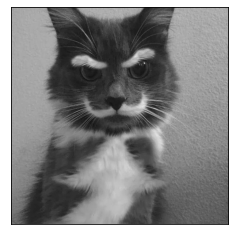

In [52]:
plt.clf()
plt.imshow(img_gray, cmap=plt.get_cmap("gray"))
plt.xticks([]); plt.yticks([]);

SVD pada citra (matriks):

In [55]:
U, Σ, Vt = np.linalg.svd(img_gray, full_matrices=False) # economy SVD

In [61]:
Σ[:5]

array([66467.25570561, 16661.23484303,  7377.76939378,  6852.16322855,
        5299.66243551])

([], <a list of 0 Text major ticklabel objects>)

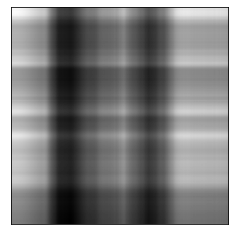

In [65]:
r = 1 # coba ubah nilai r
plt.clf()
img_approx = np.matmul( np.matmul(U[:,:r], np.diag(Σ[:r])), Vt[:r,:] )
plt.imshow(img_approx, cmap=plt.get_cmap("gray"))
plt.xticks([]); plt.yticks([])

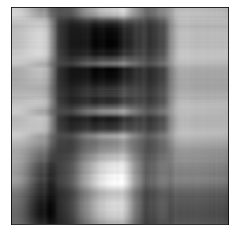

In [66]:
r = 2 # coba ubah nilai r
plt.clf()
img_approx = np.matmul( np.matmul(U[:,:r], np.diag(Σ[:r])), Vt[:r,:] )
plt.imshow(img_approx, cmap=plt.get_cmap("gray"))
plt.xticks([]); plt.yticks([]);

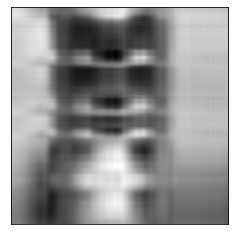

In [67]:
r = 3 # coba ubah nilai r
plt.clf()
img_approx = np.matmul( np.matmul(U[:,:r], np.diag(Σ[:r])), Vt[:r,:] )
plt.imshow(img_approx, cmap=plt.get_cmap("gray"))
plt.xticks([]); plt.yticks([]);

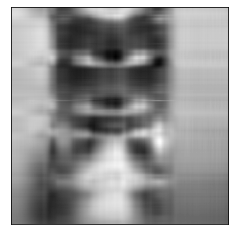

In [68]:
r = 4 # coba ubah nilai r
plt.clf()
img_approx = np.matmul( np.matmul(U[:,:r], np.diag(Σ[:r])), Vt[:r,:] )
plt.imshow(img_approx, cmap=plt.get_cmap("gray"))
plt.xticks([]); plt.yticks([]);

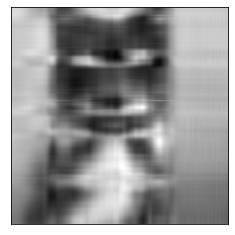

In [69]:
r = 5 # coba ubah nilai r
plt.clf()
img_approx = np.matmul( np.matmul(U[:,:r], np.diag(Σ[:r])), Vt[:r,:] )
plt.imshow(img_approx, cmap=plt.get_cmap("gray"))
plt.xticks([]); plt.yticks([]);

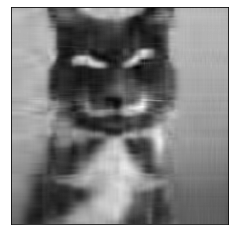

In [70]:
r = 10 # coba ubah nilai r
plt.clf()
img_approx = np.matmul( np.matmul(U[:,:r], np.diag(Σ[:r])), Vt[:r,:] )
plt.imshow(img_approx, cmap=plt.get_cmap("gray"))
plt.xticks([]); plt.yticks([]);

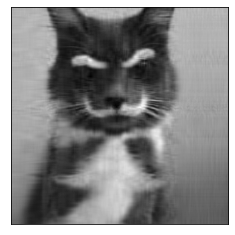

In [72]:
r = 20 # coba ubah nilai r
plt.clf()
img_approx = np.matmul( np.matmul(U[:,:r], np.diag(Σ[:r])), Vt[:r,:] )
plt.imshow(img_approx, cmap=plt.get_cmap("gray"))
plt.xticks([]); plt.yticks([]);

In [ ]:
r = 10 # coba ubah nilai r
plt.clf()
img_approx = np.matmul( np.matmul(U[:,:r], np.diag(Σ[:r])), Vt[:r,:] )
plt.imshow(img_approx, cmap=plt.get_cmap("gray"))
plt.xticks([]); plt.yticks([]);

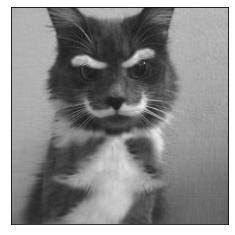

In [75]:
r = 50 # coba ubah nilai r
plt.clf()
img_approx = np.matmul( np.matmul(U[:,:r], np.diag(Σ[:r])), Vt[:r,:] )
plt.imshow(img_approx, cmap=plt.get_cmap("gray"))
plt.xticks([]); plt.yticks([]);

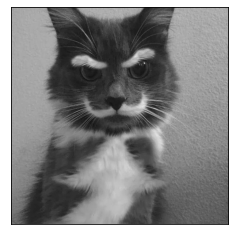

In [74]:
r = 600 # coba ubah nilai r
plt.clf()
img_approx = np.matmul( np.matmul(U[:,:r], np.diag(Σ[:r])), Vt[:r,:] )
plt.imshow(img_approx, cmap=plt.get_cmap("gray"))
plt.xticks([]); plt.yticks([]);